In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# nrows = 10011
df = pd.read_csv('Dataset/pods_resource_data.csv',nrows=10010)
df

,Timestamp,Pod,CPU,Memory
0,2025-03-02 07:59:17,api,26,73
1,2025-03-02 07:59:17,auth-service,121,60
2,2025-03-02 07:59:17,courses-service,221,63
3,2025-03-02 07:59:17,flask,32,27
4,2025-03-02 07:59:17,frontend,64,334
...,...,...,...,...
10005,2025-03-02 12:15:37,mongo,22,21
10006,2025-03-02 12:15:37,mongo-express,98,178
10007,2025-03-02 12:15:37,php,14,101
10008,2025-03-02 12:15:37,postgres-db,17,22


In [43]:
df.dtypes

Timestamp    object
Pod          object
CPU           int64
Memory        int64
dtype: object

In [44]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.dtypes

Timestamp    datetime64[ns]
Pod                  object
CPU                   int64
Memory                int64
dtype: object

### api-pod

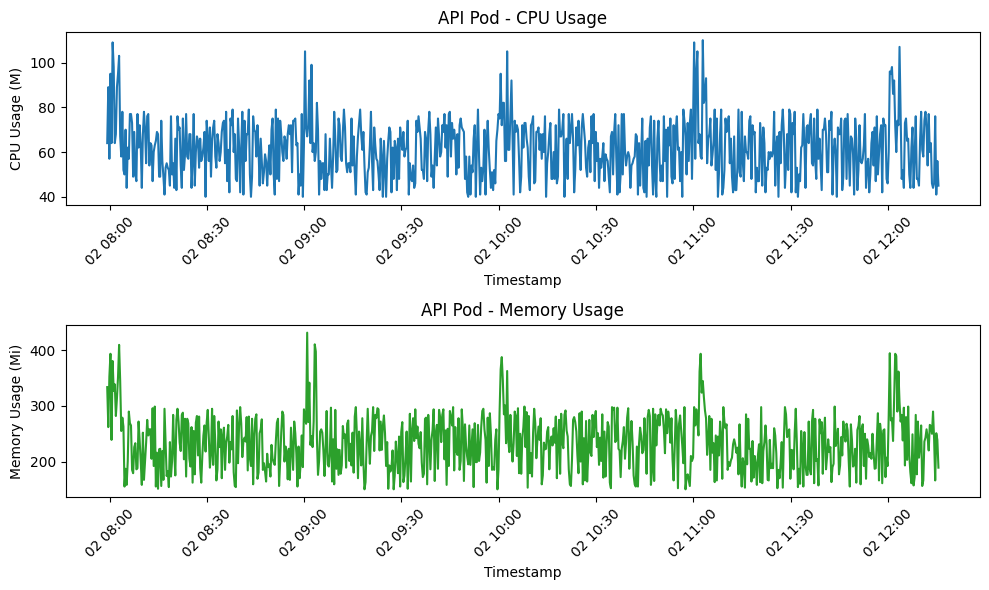

In [45]:
# Filter df for the 'api' pod from the subset
api_df_subset = df[df['Pod'] == 'frontend']

plt.figure(figsize=(10, 6))

# Plot CPU usage
plt.subplot(2, 1, 1)
plt.plot(api_df_subset['Timestamp'], api_df_subset['CPU'], label='API CPU Usage', color='tab:blue')
plt.title('API Pod - CPU Usage')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage (M)')
plt.xticks(rotation=45)

# Plot Memory usage
plt.subplot(2, 1, 2)
plt.plot(api_df_subset['Timestamp'], api_df_subset['Memory'], label='API Memory Usage', color='tab:green')
plt.title('API Pod - Memory Usage')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (Mi)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("p1.png")
plt.show()

### frontend-pod

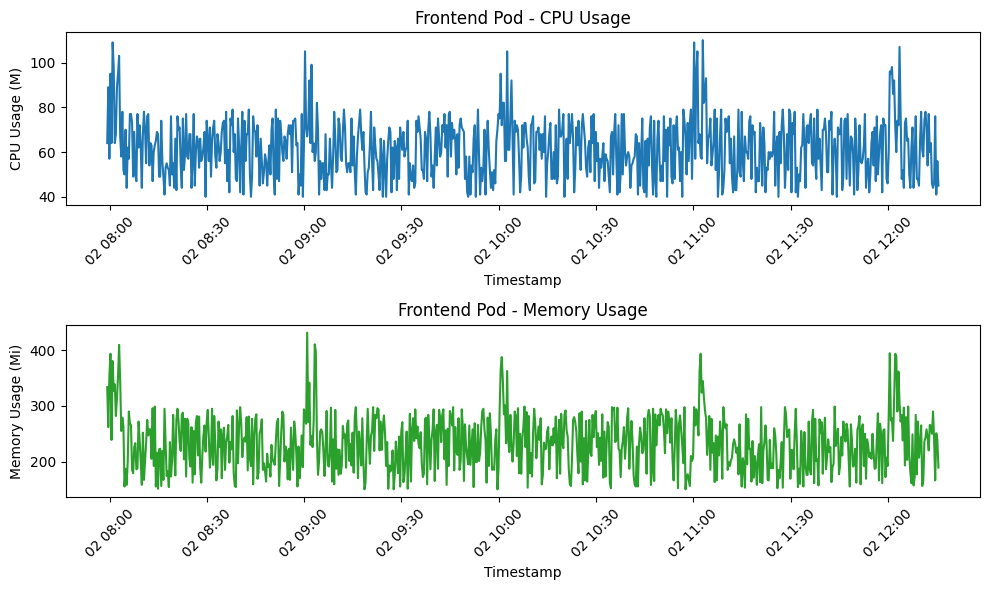

In [46]:
# Filter df for the 'frontend' pod from the subset
frontend_df_subset = df[df['Pod'] == 'frontend']

plt.figure(figsize=(10, 6))

# Plot CPU usage
plt.subplot(2, 1, 1)
plt.plot(frontend_df_subset['Timestamp'], frontend_df_subset['CPU'], label='Frontend CPU Usage', color='tab:blue')
plt.title('Frontend Pod - CPU Usage')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage (M)')
plt.xticks(rotation=45)

# Plot Memory usage
plt.subplot(2, 1, 2)
plt.plot(frontend_df_subset['Timestamp'], frontend_df_subset['Memory'], label='Frontend Memory Usage', color='tab:green')
plt.title('Frontend Pod - Memory Usage')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (Mi)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### courses-pod

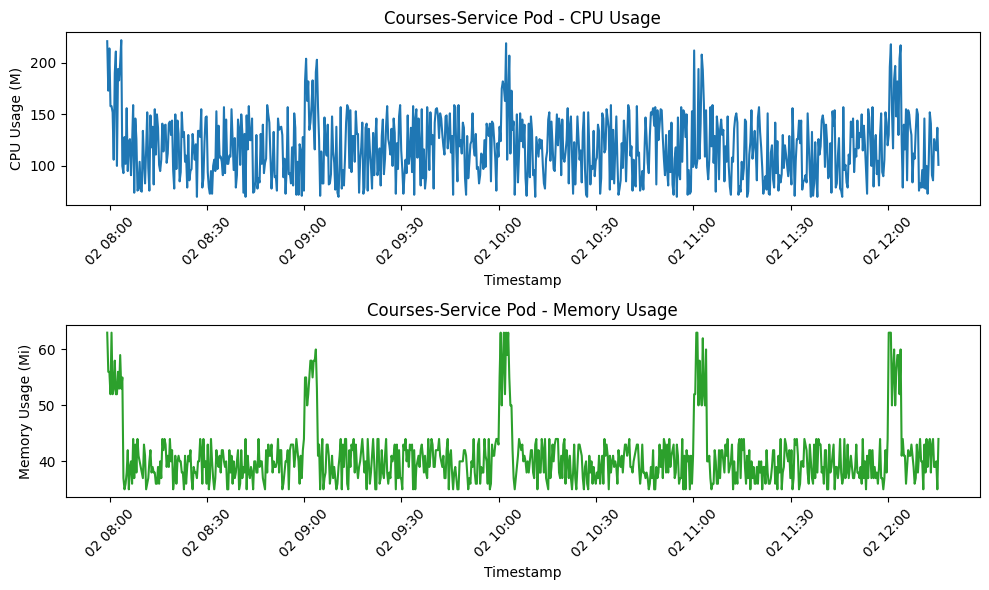

In [47]:
courses_service_df_subset = df[df['Pod'] == 'courses-service']

# Create subplots for CPU and Memory usage of the 'courses-service' pod
plt.figure(figsize=(10, 6))

# Plot CPU usage
plt.subplot(2, 1, 1)
plt.plot(courses_service_df_subset['Timestamp'], courses_service_df_subset['CPU'], label='Courses-Service CPU Usage', color='tab:blue')
plt.title('Courses-Service Pod - CPU Usage')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage (M)')
plt.xticks(rotation=45)

# Plot Memory usage
plt.subplot(2, 1, 2)
plt.plot(courses_service_df_subset['Timestamp'], courses_service_df_subset['Memory'], label='Courses-Service Memory Usage', color='tab:green')
plt.title('Courses-Service Pod - Memory Usage')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (Mi)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### mongo-express

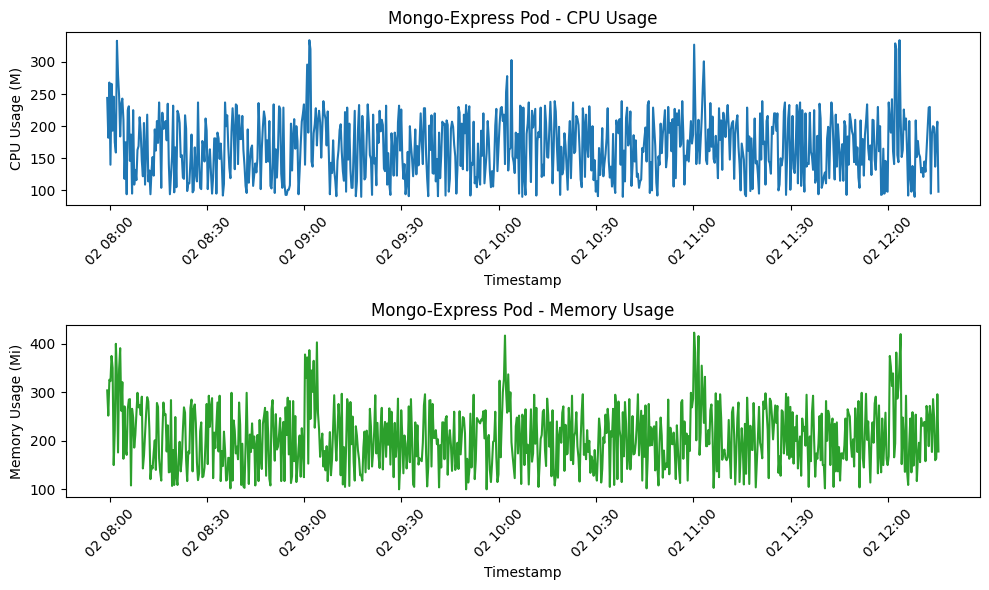

In [48]:
mongo_express_df_subset = df[df['Pod'] == 'mongo-express']

plt.figure(figsize=(10, 6))

# Plot CPU usage
plt.subplot(2, 1, 1)
plt.plot(mongo_express_df_subset['Timestamp'], mongo_express_df_subset['CPU'], label='Mongo-Express CPU Usage', color='tab:blue')
plt.title('Mongo-Express Pod - CPU Usage')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage (M)')
plt.xticks(rotation=45)

# Plot Memory usage
plt.subplot(2, 1, 2)
plt.plot(mongo_express_df_subset['Timestamp'], mongo_express_df_subset['Memory'], label='Mongo-Express Memory Usage', color='tab:green')
plt.title('Mongo-Express Pod - Memory Usage')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage (Mi)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

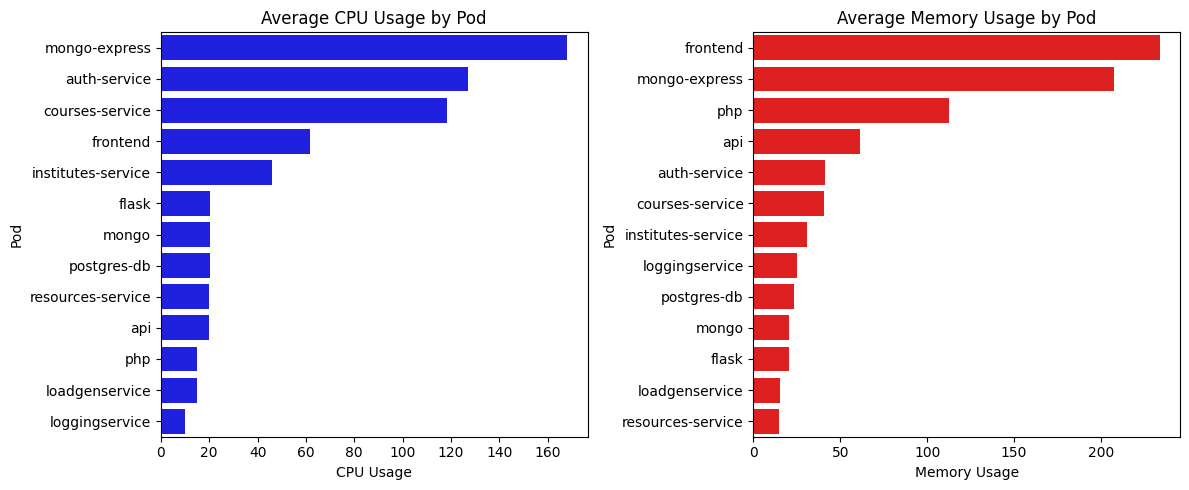

In [82]:
df_pod = df.groupby("Pod")[["CPU", "Memory"]].mean().reset_index()

# Ensure columns are numeric
df_pod["CPU"] = pd.to_numeric(df_pod["CPU"], errors="coerce")
df_pod["Memory"] = pd.to_numeric(df_pod["Memory"], errors="coerce")

plt.figure(figsize=(12, 5))

# Plot CPU usage by Pod
plt.subplot(1, 2, 1)
sns.barplot(data=df_pod, x="CPU", y="Pod", color="blue", order=df_pod.sort_values("CPU", ascending=False)["Pod"])
plt.title("Average CPU Usage by Pod")
plt.xlabel("CPU Usage")
plt.ylabel("Pod")

# Plot Memory usage by Pod
plt.subplot(1, 2, 2)
sns.barplot(data=df_pod, x="Memory", y="Pod", color="red", order=df_pod.sort_values("Memory", ascending=False)["Pod"])
plt.title("Average Memory Usage by Pod")
plt.xlabel("Memory Usage")
plt.ylabel("Pod")

plt.tight_layout()
plt.show()

#### STL Decomposition (all pods):

In [50]:
from statsmodels.tsa.seasonal import STL

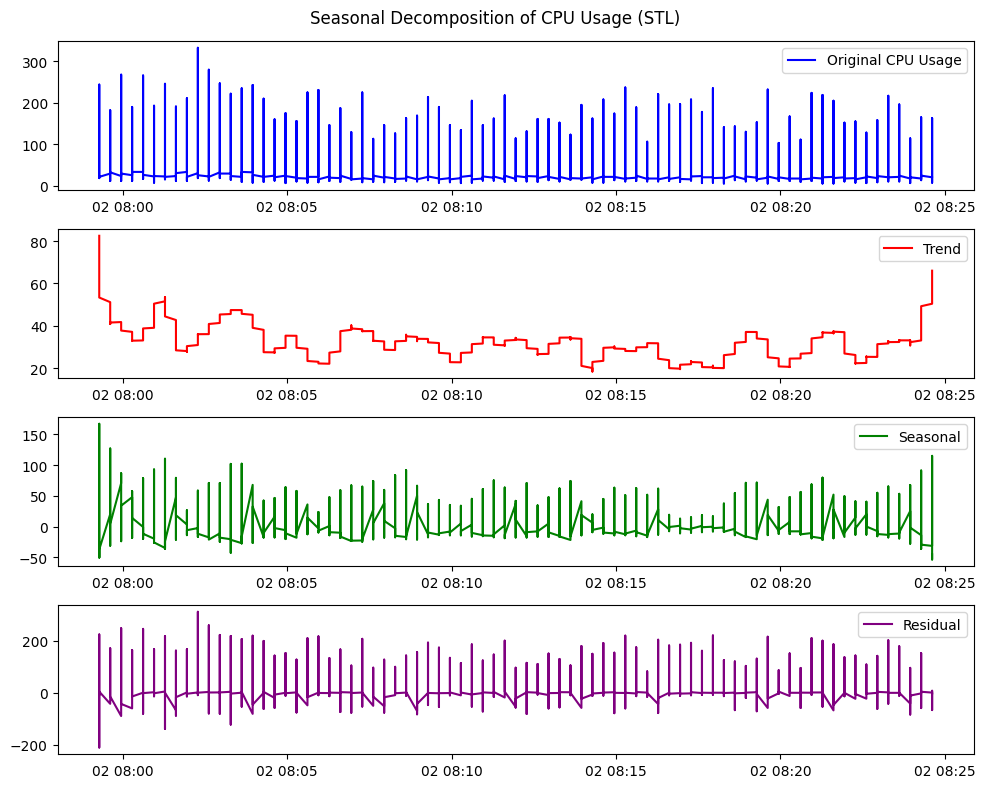

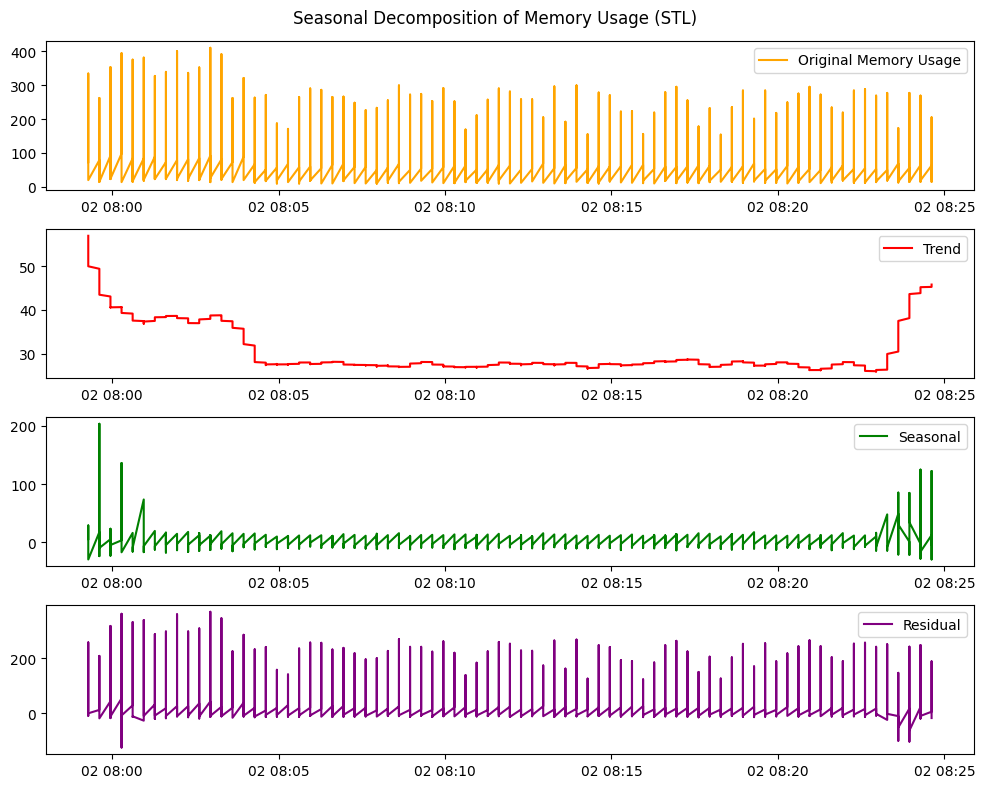

In [63]:

file_path = 'Dataset/pods_resource_data.csv'  
df = pd.read_csv(file_path,nrows=1000)

#  'Timestamp' to datetime format and then make it index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)


# Perform STL decomposition for CPU and Memory usage
# STL (Seasonal-Trend decomposition using LOESS) breaks down a time-series into:
# - Trend: Long-term movement in df
# - Seasonality: Repeating patterns at a fixed period
# - Residual: Random fluctuations after removing trend and seasonality

cpu_decomposition = STL(df['CPU'], period=12, robust=True).fit()  # for how much  period we want to find
memory_decomposition = STL(df['Memory'], period=24, robust=True).fit()

plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df.index, df['CPU'], label='Original CPU Usage', color='blue')
plt.legend()

plt.subplot(412)
plt.plot(cpu_decomposition.trend, label='Trend', color='red')
plt.legend()

plt.subplot(413)
plt.plot(cpu_decomposition.seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(414)
plt.plot(cpu_decomposition.resid, label='Residual', color='purple')
plt.legend()

plt.suptitle("Seasonal Decomposition of CPU Usage (STL)")
plt.tight_layout()
plt.show()

# Plot Memory Decomposition
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df.index, df['Memory'], label='Original Memory Usage', color='orange')
plt.legend()

plt.subplot(412)
plt.plot(memory_decomposition.trend, label='Trend', color='red')
plt.legend()

plt.subplot(413)
plt.plot(memory_decomposition.seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(414)
plt.plot(memory_decomposition.resid, label='Residual', color='purple')
plt.legend()

plt.suptitle("Seasonal Decomposition of Memory Usage (STL)")
plt.tight_layout()
# plt.savefig()
plt.show()

In [64]:
# import statsmodels.api as sm

# file_path = 'Dataset/pods_resource_data.csv'  # Replace with your actual file path
# df = pd.read_csv(file_path,nrows=1000)

# # Convert 'Timestamp' to datetime format and set it as the index
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# df.set_index('Timestamp', inplace=True)

# # Sort df by timestamp
# df = df.sort_index()

# # Perform seasonal decomposition on CPU usage (period is assumed as 96 for daily seasonality)
# cpu_decomposition = sm.tsa.seasonal_decompose(df['CPU'], model='additive', period=96)

# # Perform seasonal decomposition on Memory usage (period is assumed as 96 for daily seasonality)
# memory_decomposition = sm.tsa.seasonal_decompose(df['Memory'], model='additive', period=96)

# # Plot CPU Decomposition
# plt.figure(figsize=(10, 8))

# plt.subplot(411)
# plt.plot(df.index, df['CPU'], label='Original CPU Usage', color='blue')
# plt.legend()

# plt.subplot(412)
# plt.plot(cpu_decomposition.trend, label='Trend', color='red')
# plt.legend()

# plt.subplot(413)
# plt.plot(cpu_decomposition.seasonal, label='Seasonal', color='green')
# plt.legend()

# plt.subplot(414)
# plt.plot(cpu_decomposition.resid, label='Residual', color='purple')
# plt.legend()

# plt.suptitle("Seasonal Decomposition of CPU Usage (Statsmodels)")
# plt.tight_layout()
# plt.show()

# # Plot Memory Decomposition
# plt.figure(figsize=(10, 8))

# plt.subplot(411)
# plt.plot(df.index, df['Memory'], label='Original Memory Usage', color='orange')
# plt.legend()

# plt.subplot(412)
# plt.plot(memory_decomposition.trend, label='Trend', color='red')
# plt.legend()

# plt.subplot(413)
# plt.plot(memory_decomposition.seasonal, label='Seasonal', color='green')
# plt.legend()

# plt.subplot(414)
# plt.plot(memory_decomposition.resid, label='Residual', color='purple')
# plt.legend()

# plt.suptitle("Seasonal Decomposition of Memory Usage (Statsmodels)")
# plt.tight_layout()
# plt.show()

## visualization of df 
- seasonal 

<Figure size 1000x800 with 0 Axes>

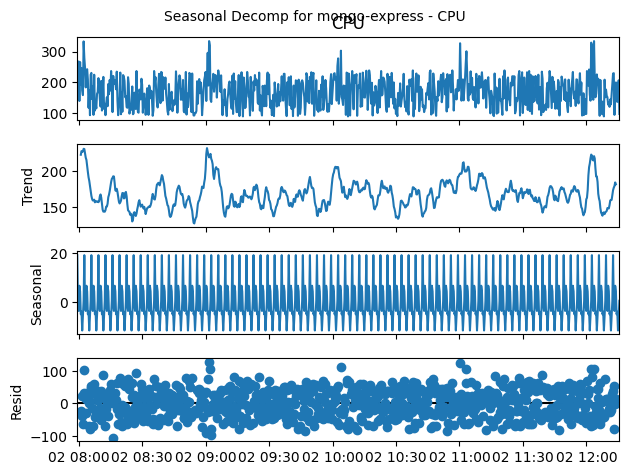

<Figure size 1000x800 with 0 Axes>

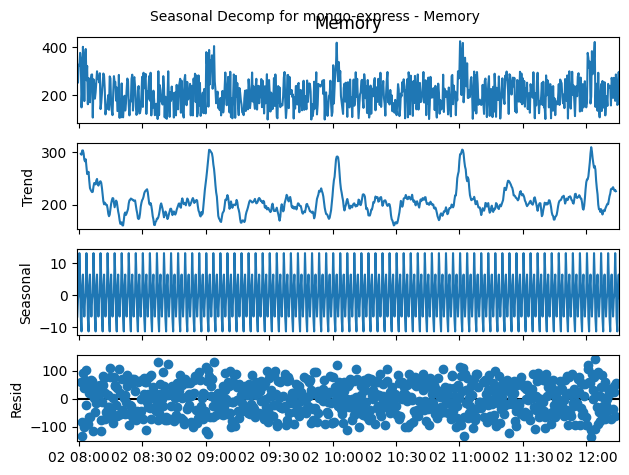

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt

# Load df
df = pd.read_csv("Dataset/pods_resource_data.csv", nrows=10010)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# List of pods to analyze
pods = ["mongo-express"] # add more pods 

for pod in pods:
    pod_data = df[df["Pod"] == pod].set_index("Timestamp")

    plt.figure(figsize=(10, 8))
    cpu_result = seasonal_decompose(pod_data["CPU"], model="additive", period=10)
    cpu_result.plot()
    plt.suptitle(f"Seasonal Decomp for {pod} - CPU", fontsize=10)
    plt.show()

    # Seasonal decomposition for Memory usage
    plt.figure(figsize=(10, 8))
    memory_result = seasonal_decompose(pod_data["Memory"], model="additive", period=10)
    memory_result.plot()
    plt.suptitle(f"Seasonal Decomp for {pod} - Memory", fontsize=10)
    plt.show()